In [1]:
import pandas as pd
import numpy as np
import math

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

13 - (a) Using the rnorm() function, create a vector, x, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X.

In [2]:
# x from normal distribution with fixed value selection
n = 100
np.random.seed(0)
x = np.random.normal(size = n)

13 - (b) Using the rnorm() function, create a vector, eps, containing 100 observations drawn from a N(0,0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

In [3]:
# error term 
eps1 = np.random.normal(scale = 0.25, size = n)

13 - (c) Using x and eps, generate a vector y according to the model: Y =−1+0.5X+ε

In [4]:
# y as a function of x + error
y1 = - 1.0 + 0.5 * x + eps1

13 - (d) Create a scatterplot displaying the relationship between x and y

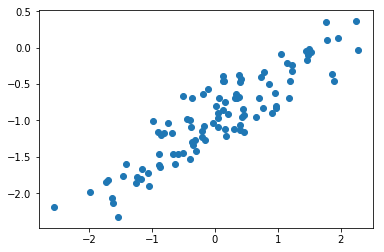

In [5]:
plt.scatter(x, y1)

13 - (e) Fit a least squares linear model to predict y using x

In [6]:
results1 = sm.OLS(y1, sm.add_constant(x)).fit()

In [7]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     421.1
Date:                Wed, 15 Aug 2018   Prob (F-statistic):           2.96e-37
Time:                        21:28:10   Log-Likelihood:                -6.0443
No. Observations:                 100   AIC:                             16.09
Df Residuals:                      98   BIC:                             21.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9812      0.026    -37.722      0.0

13 - (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() command to create an appropriate legend.

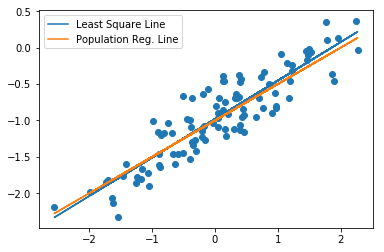

In [8]:
plt.scatter(x, y1)
plt.plot(x, results1.fittedvalues, label = 'Least Square Line')
plt.plot(x, (- 1.0 + 0.5 * x), label = 'Population Reg. Line')
plt.legend()

13 - (g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit?

In [9]:
X = pd.DataFrame(np.hstack( (x.reshape(n, 1), y1.reshape(n, 1)) ), columns = ['x', 'y'])

In [10]:
fformula = 'y ~ 1 + x + np.power(x, 2)'
results12 = sm.OLS.from_formula(formula = fformula, data = X).fit()

In [11]:
print(results12.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     210.2
Date:                Wed, 15 Aug 2018   Prob (F-statistic):           5.44e-36
Time:                        21:28:10   Log-Likelihood:                -5.6904
No. Observations:                 100   AIC:                             17.38
Df Residuals:                      97   BIC:                             25.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9643      0.033    -29.

13 - (h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same.

In [12]:
# error term 
eps2 = np.random.normal(scale = 0.1, size = n)

In [13]:
# y as a function of x + error
y2 = - 1.0 + 0.5 * x + eps2

In [14]:
results2 = sm.OLS(y2, sm.add_constant(x)).fit()

In [15]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2842.
Date:                Wed, 15 Aug 2018   Prob (F-statistic):           3.41e-74
Time:                        21:28:10   Log-Likelihood:                 93.574
No. Observations:                 100   AIC:                            -183.1
Df Residuals:                      98   BIC:                            -177.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0064      0.010   -104.767      0.0

13 - (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() command to create an appropriate legend.

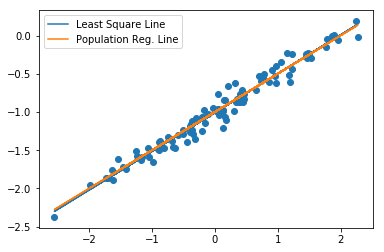

In [16]:
plt.scatter(x, y2)
plt.plot(x, results2.fittedvalues, label = 'Least Square Line')
plt.plot(x, (- 1.0 + 0.5 * x), label = 'Population Reg. Line')
plt.legend()

13 - (j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set?

In [17]:
results1.conf_int(alpha = 0.05, cols = None)

array([[-1.03283043, -0.92959303],
       [ 0.47754953,  0.57979968]])

In [18]:
results2.conf_int(alpha = 0.05, cols = None)

array([[-1.02541532, -0.98729113],
       [ 0.48830978,  0.5260694 ]])